In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
elo_df = (
    pd.read_csv("ELO.csv", sep = ";")
    .rename(columns = {"Unnamed: 0": "filepath"})
    .assign(
        configuration = lambda a: a.filepath.str.split("/").str[-2],
        iteration = lambda a: a.filepath.str.split("/").str[-1].str.split("_").str[-1].str.split(".").str[0].astype("int"),
        ELO = lambda a: a.ELO + abs(a.ELO.min())
    )
    .sort_values(["configuration", "iteration"])
)
elo_df.head()

,filepath,ELO,configuration,iteration
0,alquerque/best_models/100_nonsymetric/checkpoi...,64.981512,100_nonsymetric,1
6,alquerque/best_models/100_nonsymetric/checkpoi...,0.000000,100_nonsymetric,2
26,alquerque/best_models/100_nonsymetric/checkpoi...,87.749539,100_nonsymetric,6
27,alquerque/best_models/100_nonsymetric/checkpoi...,47.434078,100_nonsymetric,7
31,alquerque/best_models/100_nonsymetric/checkpoi...,86.033204,100_nonsymetric,8


Text(0, 0.5, 'ELO (init = 0, k=20)')

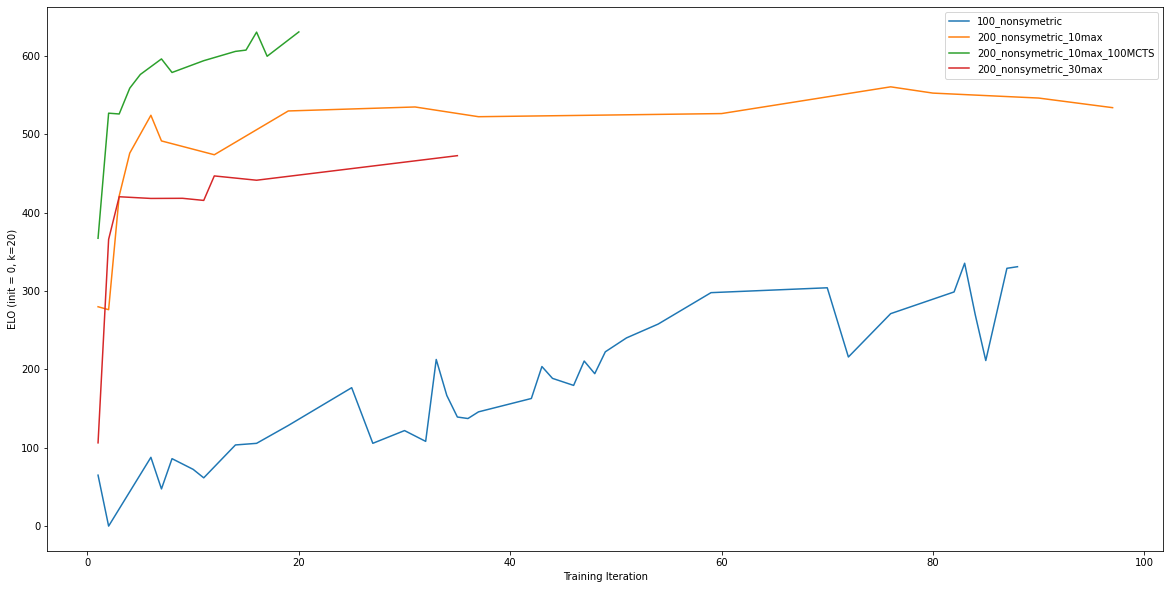

In [6]:
(
    elo_df
    .set_index("iteration")
    .groupby("configuration")
    .ELO
    .plot(legend=True, use_index=True, figsize = (20,10))
)
plt.xlabel("Training Iteration")
plt.ylabel("ELO (init = 0, k=20) + min()")
